In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
phishing_df = pd.read_csv('dataset_phishing.csv')
phishing_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


### Exploring the Data

In [3]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [4]:
phishing_df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [5]:
phishing_df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

In [18]:
phishing_df['status'].replace(['legitimate', 'phishing'], [0, 1], inplace=True)

There is an equal number of legitimate and phishing links present in the dataset.

In [19]:
from sklearn.feature_selection import mutual_info_classif

In [20]:
X = phishing_df.drop(columns = ['url', 'status'])
y = phishing_df['status']

In [21]:
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series

web_traffic                0.300597
google_index               0.300579
domain_age                 0.280349
ratio_intHyperlinks        0.241283
ratio_extHyperlinks        0.239279
                             ...   
nb_space                   0.000000
random_domain              0.000000
whois_registered_domain    0.000000
ratio_intErrors            0.000000
nb_comma                   0.000000
Length: 87, dtype: float64

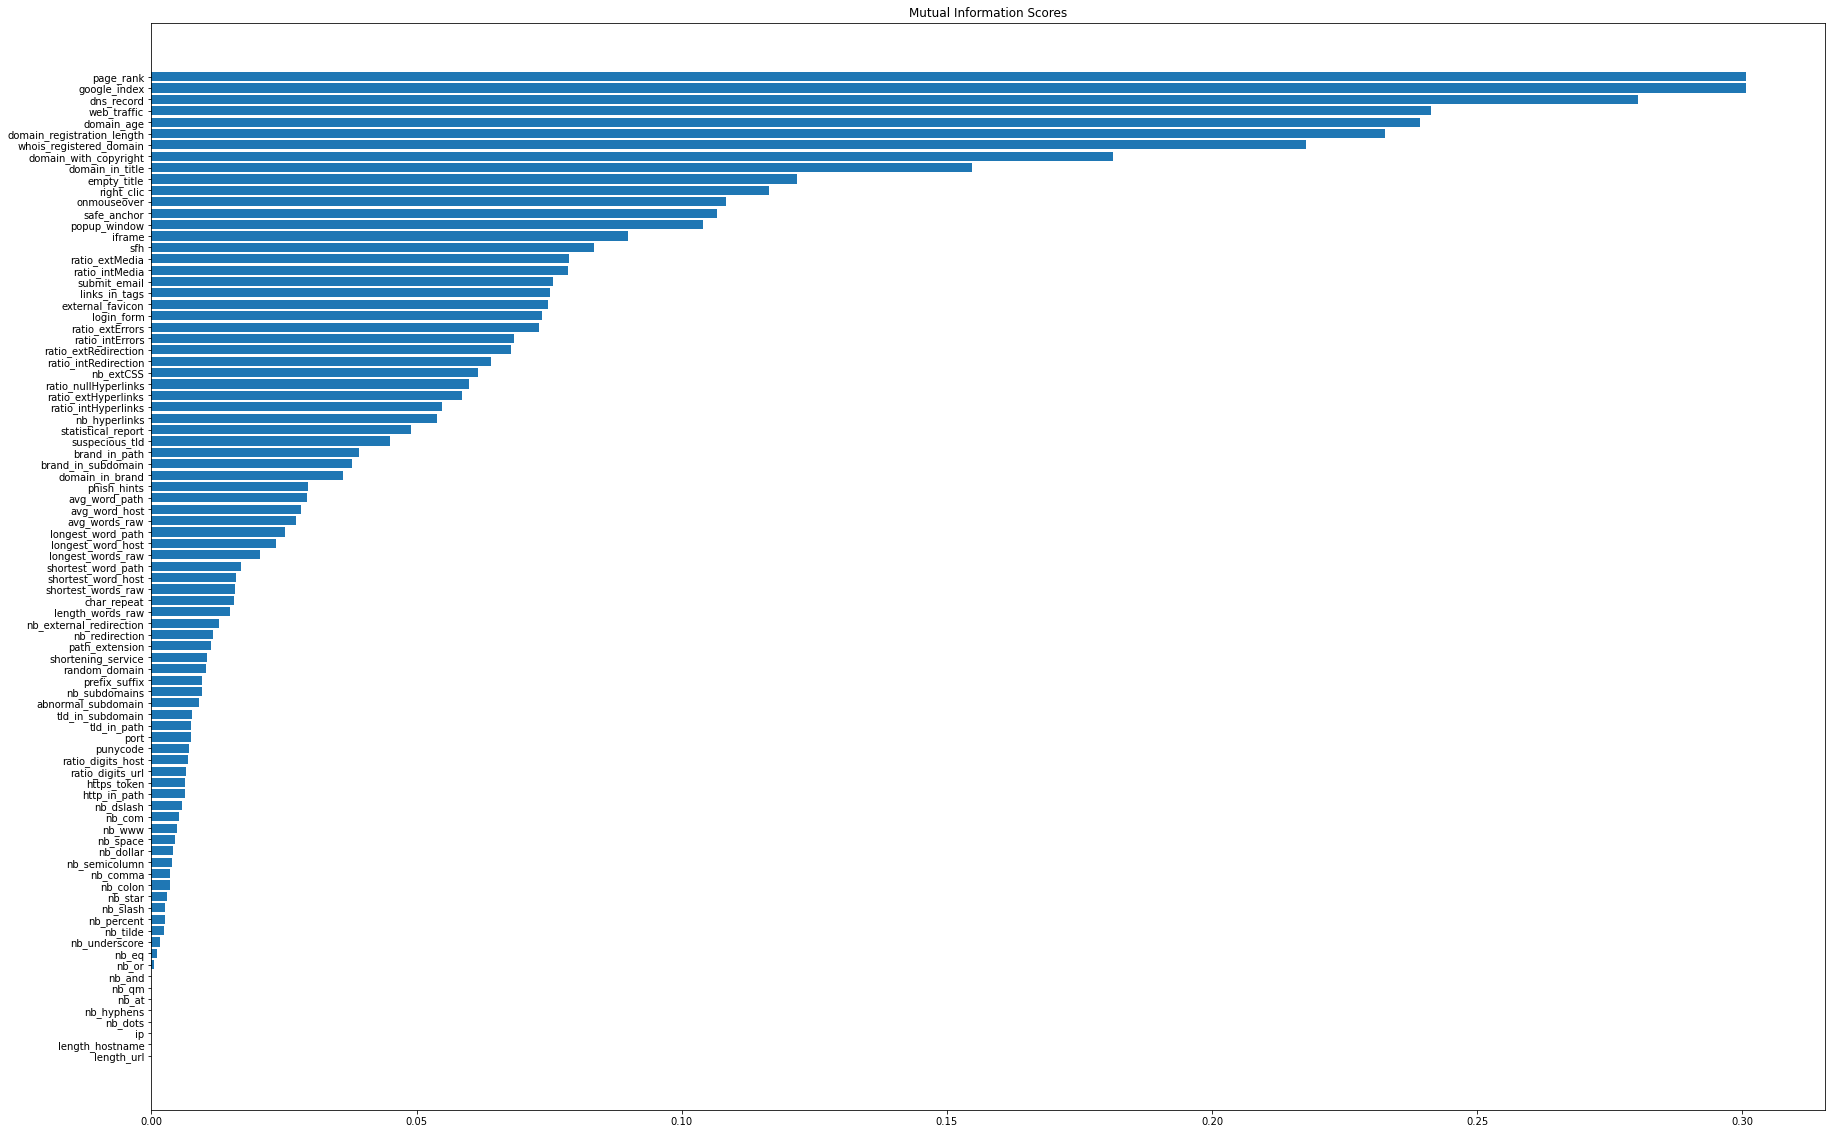

In [22]:
width = np.arange(len(mi_scores))

plt.figure(figsize=(30, 20))
plt.barh(width, np.sort(mi_scores))
plt.yticks(width, X.columns)
plt.title("Mutual Information Scores")

plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [24]:
def train_rfc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rfc = RandomForestClassifier(n_estimators=200, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    
    return accuracy, precision, recall, f1

In [25]:
n = np.count_nonzero(mi_scores)
features = mi_series.index.to_numpy()

y = phishing_df['status']
scores = []

for i in range(20, n, 1):
    top_n_features = features[:i]
    X = phishing_df[top_n_features]
    
    accuracy, precision, recall, f1 = train_rfc(X, y)
    scores.append([i, accuracy, precision, recall, f1])

In [26]:
results = pd.DataFrame(scores, columns=['num_features', 'accuracy', 'precision', 'recall', 'f1-score'])
results

,num_features,accuracy,precision,recall,f1-score
0,20,0.962561,0.960084,0.964814,0.962443
1,21,0.960812,0.960784,0.960784,0.960784
2,22,0.962911,0.962185,0.963534,0.962859
3,23,0.962561,0.961485,0.963509,0.962496
4,24,0.966760,0.967087,0.966410,0.966748
5,25,0.963611,0.964286,0.962937,0.963611
6,26,0.962561,0.964286,0.960921,0.962600
7,27,0.962561,0.962885,0.962211,0.962548
8,28,0.963961,0.962885,0.964912,0.963898
9,29,0.965010,0.965686,0.964336,0.965010


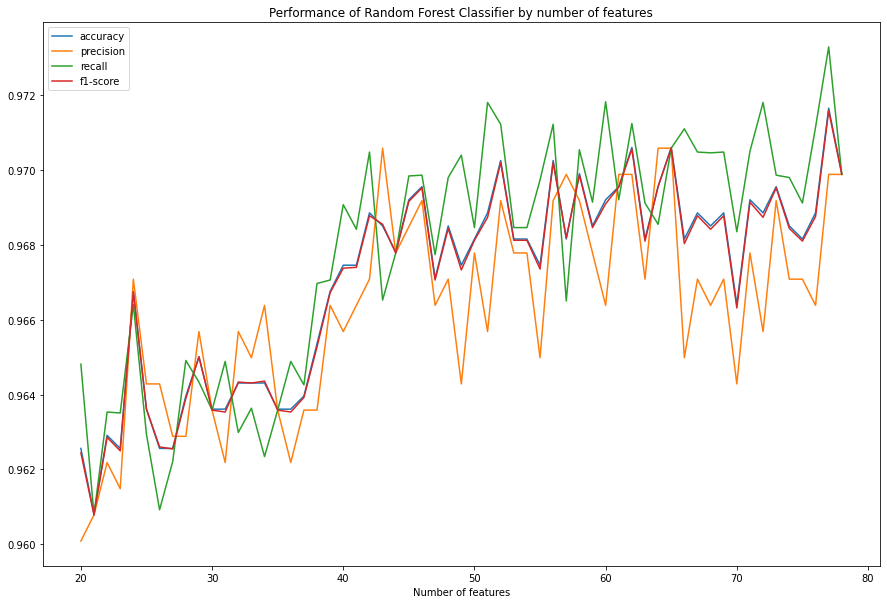

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(results['num_features'], results['accuracy'], label='accuracy')
plt.plot(results['num_features'], results['precision'], label='precision')
plt.plot(results['num_features'], results['recall'], label='recall')
plt.plot(results['num_features'], results['f1-score'], label='f1-score')

plt.title('Performance of Random Forest Classifier by number of features')
plt.xlabel('Number of features')
plt.legend()
plt.show()

In [28]:
results['num_features'][results['accuracy'].argmax()]

77

In [29]:
results['num_features'][results['f1-score'].argmax()]

77

In [30]:
best_n = 77

In [32]:
X = phishing_df[features[:best_n]]
y = phishing_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [33]:
print(f'accuracy: {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

accuracy: 0.9716585024492652
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1430
           1       0.97      0.97      0.97      1428

    accuracy                           0.97      2858
   macro avg       0.97      0.97      0.97      2858
weighted avg       0.97      0.97      0.97      2858



In [34]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)